In [1]:
import pandas
import numpy

import matplotlib.pyplot as plt

from scipy import stats
from typing import Iterable


In [2]:
df = pandas.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294347-0809/sf-sea-level-rise-sample.csv")

array([[<AxesSubplot: title={'center': 'NonWhite'}>]], dtype=object)

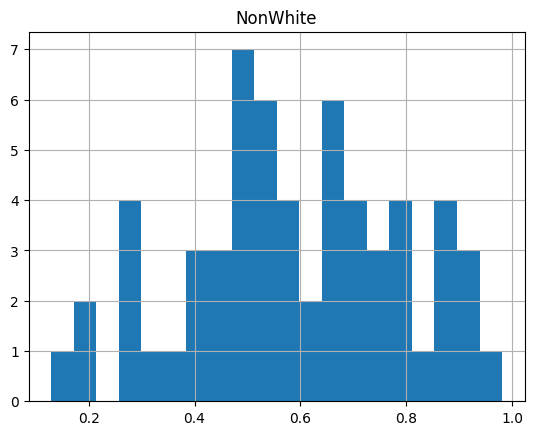

In [3]:
df.hist(column="NonWhite", bins=20)

In [4]:
white = df[df["NonWhite"] < 0.6]
black = df[df["NonWhite"] >= 0.6]

# H0: mean(education in white) == mean(education in black)
# H1: mean(education in white) > mean(education in black)

array([[<AxesSubplot: title={'center': 'Education'}>]], dtype=object)

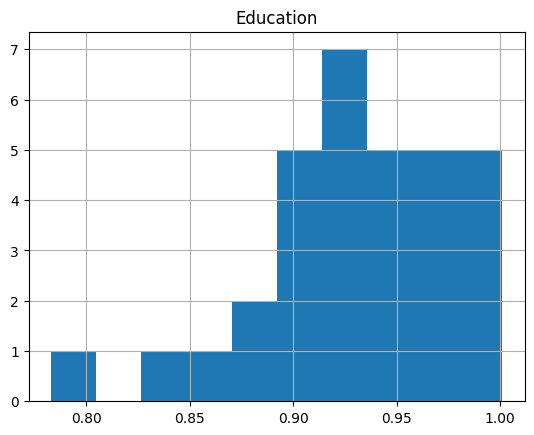

In [5]:
white.hist(column="Education")

array([[<AxesSubplot: title={'center': 'Education'}>]], dtype=object)

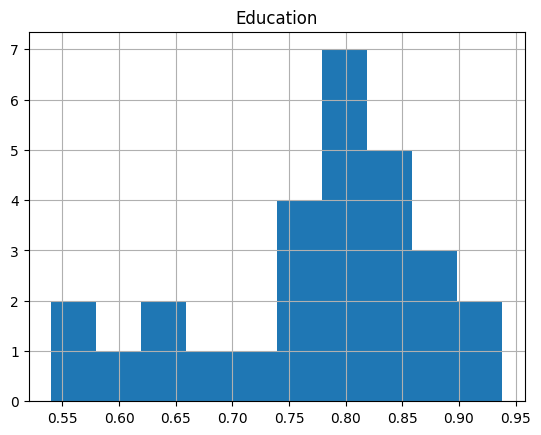

In [6]:
black.hist(column="Education")


In [7]:
def difference_of_means_test(
    control: Iterable[float], treatment: Iterable[float], tails: int = 1
):
    n_1, n_2 = len(control), len(treatment)
    x_1, x_2 = numpy.mean(control), numpy.mean(treatment)

    # sample SD formula (aka Bessel’s correction): use n-1 in denominator
    s_1, s_2 = numpy.std(control, ddof=1), numpy.std(
        treatment, ddof=1
    )

    # conservative estimate from OpenIntro
    DOF = min(n_1, n_2) - 1

    SE = numpy.sqrt(s_1**2 / n_1 + s_2**2 / n_2)
    t_score = numpy.abs((x_2 - x_1)) / SE
    p_value = tails * stats.t.cdf(-t_score, DOF)

    # OpenIntro section 5.3.6
    pooled_SD = numpy.sqrt(
        (s_1**2 * (n_1 - 1) + s_2**2 * (n_2 - 1)) / (n_1 + n_2 - 2)
    )
    cohen_d = (x_2 - x_1) / pooled_SD

    return p_value, cohen_d


In [8]:
p_value, cohen_d = difference_of_means_test(
    white["Education"], black["Education"], tails=1
)
print(f"p-value: {p_value}, Cohen's d: {cohen_d}")


p-value: 5.196124860575477e-08, Cohen's d: -1.9364165256257408
